<a href="https://colab.research.google.com/github/Nkoyoasuz/A-Comprehensive-Dataset-for-Predicting-Diabetes-with-Medical-Demographic-Data/blob/main/Diabetes_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [23]:
df = pd.read_csv('/content/drive/MyDrive/diabetes_prediction_dataset.csv')

In [24]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#Data Cleaning

 Check for Missing Values

In [25]:
df.shape

(100000, 9)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [27]:
df.dtypes

,0
gender,object
age,float64
hypertension,int64
heart_disease,int64
smoking_history,object
bmi,float64
HbA1c_level,float64
blood_glucose_level,int64
diabetes,int64


In [28]:
df.isnull().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


Detect Zeros in Unusual Columns

In [29]:
cols_with_zero = ['hypertension', 'heart_disease', 'diabetes']
for col in cols_with_zero:
    print(f'{col} has {(df[col] == 0).sum()} zeros')

hypertension has 92515 zeros
heart_disease has 96058 zeros
diabetes has 91500 zeros


# Exploratory Data Analysis (EDA)

Correlation matrix

In [39]:
# Encode categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['smoking_history'] = le.fit_transform(df['smoking_history'])

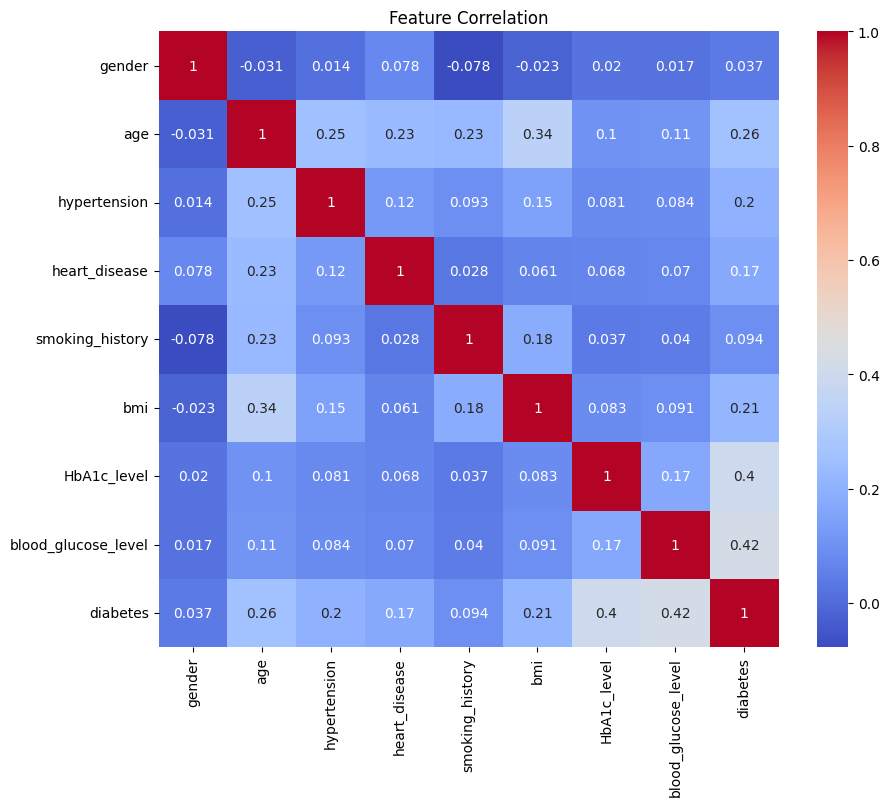

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

This shows how many people in the dataset have diabetes vs. those who don’t.

#Distribution of classes

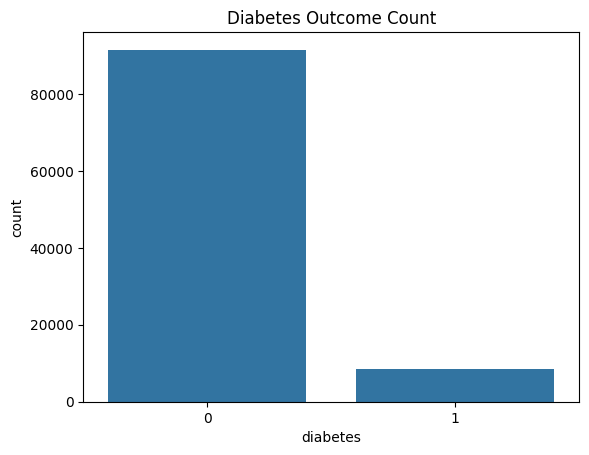

In [43]:
sns.countplot(x='diabetes', data=df)
plt.title("Diabetes Outcome Count")
plt.show()

#Boxplots to detect outliers

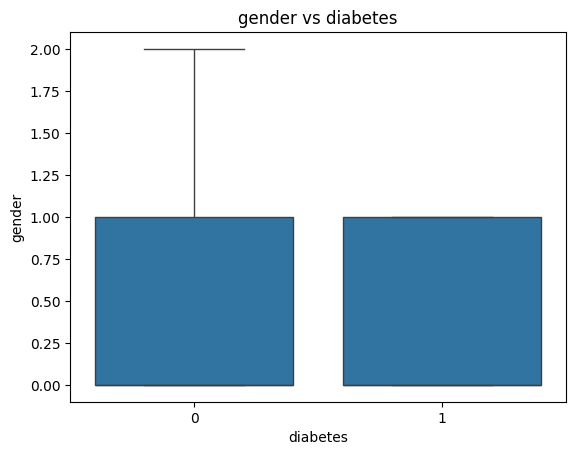

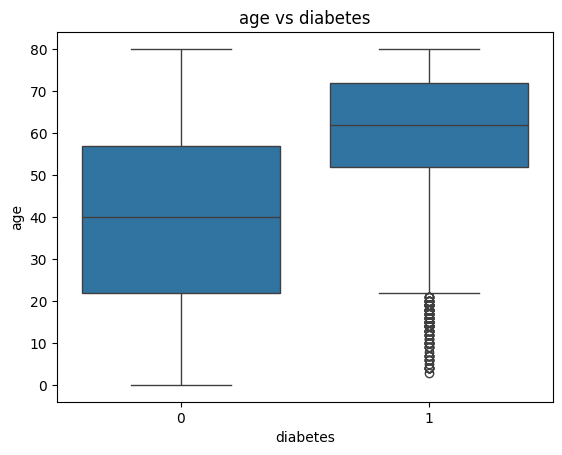

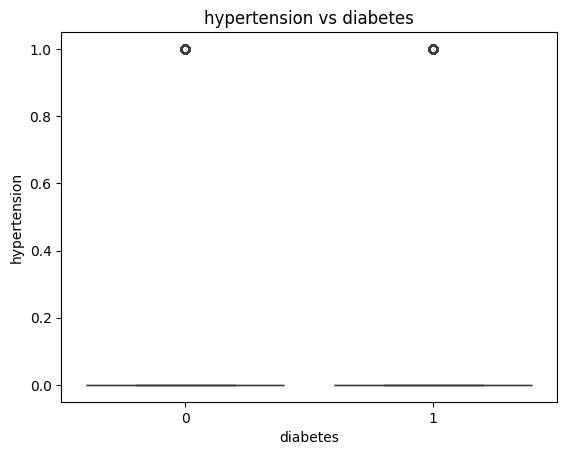

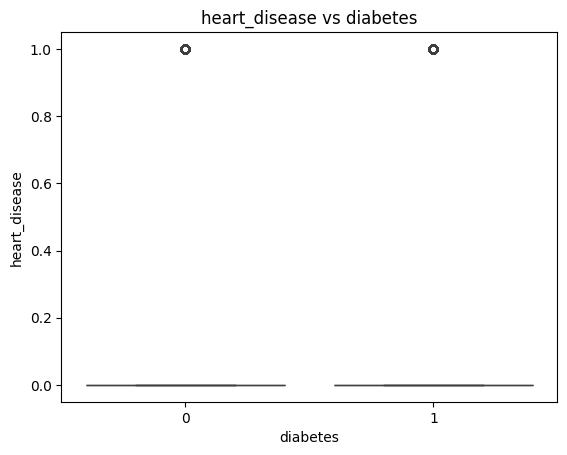

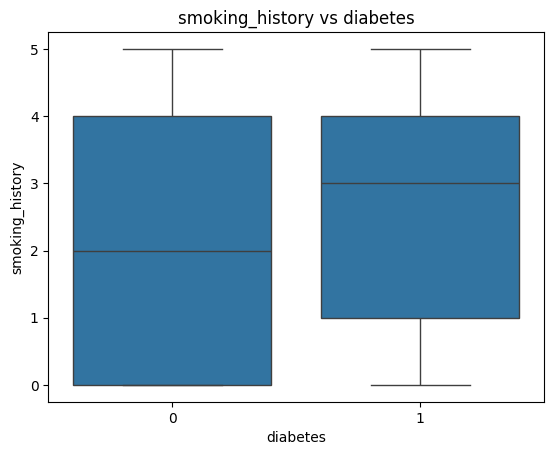

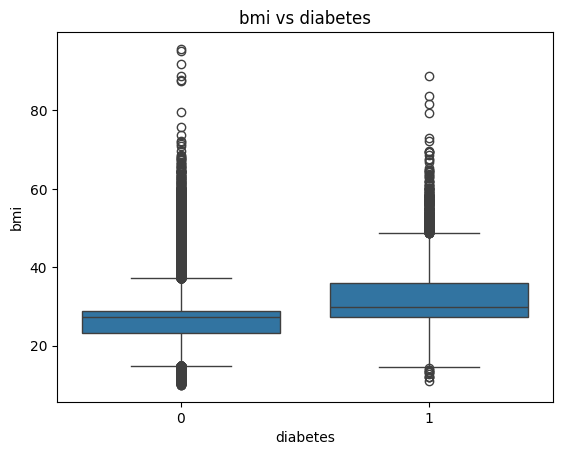

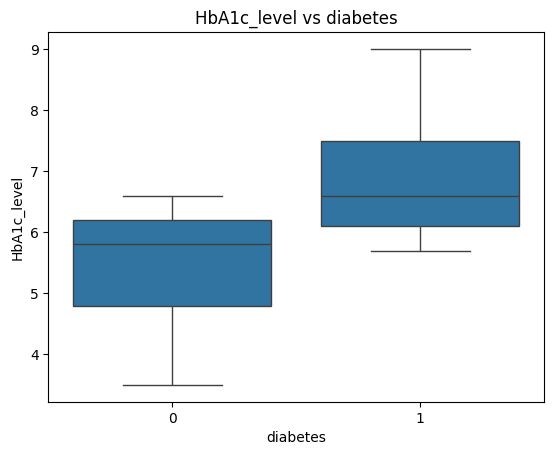

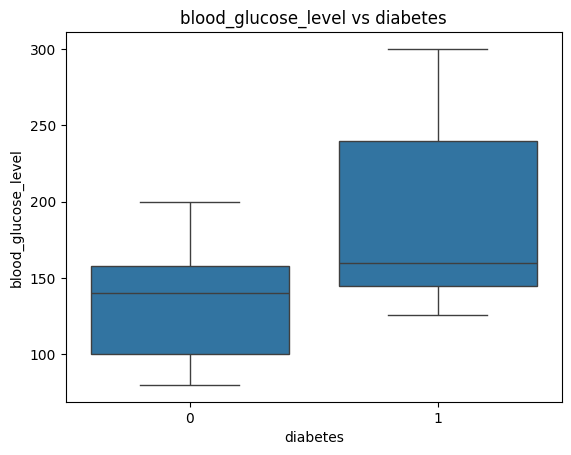

In [46]:
for col in df.columns[:-1]:
    sns.boxplot(x='diabetes', y=col, data=df)
    plt.title(f'{col} vs diabetes')
    plt.show()

#Feature Scaling

Use StandardScaler to normalize features (important for SVM, Logistic Regression).

In [49]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Train-Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

#Model Training and Evaluation

In [51]:
def evaluate_model(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))

Train multiple models:

In [55]:
evaluate_model(LogisticRegression(), "Logistic Regression")
evaluate_model(DecisionTreeClassifier(), "Decision Tree")
evaluate_model(RandomForestClassifier(), "Random Forest")
evaluate_model(SVC(), "Support Vector Machine")
evaluate_model(GaussianNB(), "Naive Bayes")


Logistic Regression
[[18122   178]
 [  617  1083]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Accuracy: 0.96025

Decision Tree
[[17791   509]
 [  455  1245]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18300
           1       0.71      0.73      0.72      1700

    accuracy                           0.95     20000
   macro avg       0.84      0.85      0.85     20000
weighted avg       0.95      0.95      0.95     20000

Accuracy: 0.9518

Random Forest
[[18232    68]
 [  528  1172]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.95      0.69      0.80      1700

   

#Compare Model Performances

Logistic Regression: 0.96025
Decision Tree: 0.952
Random Forest: 0.97035
SVM: 0.96445
Naive Bayes: 0.90455


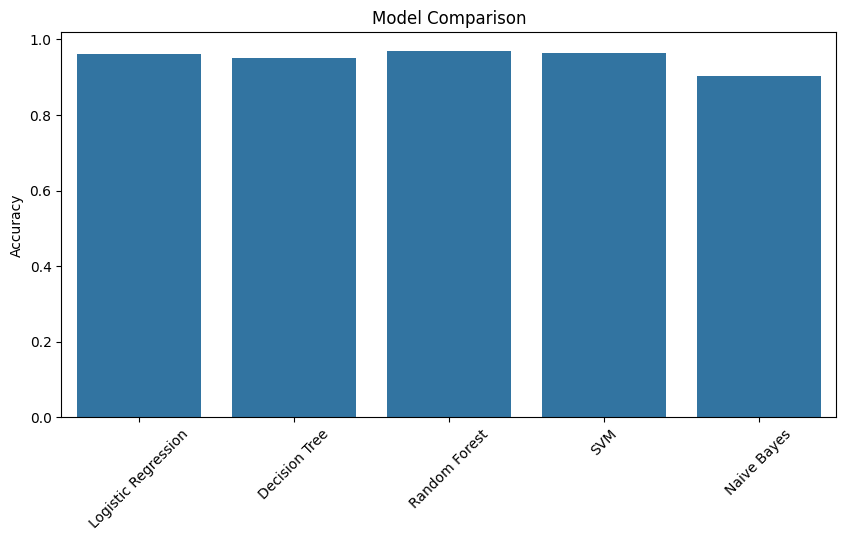

In [58]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results[name] = acc
    print(f"{name}: {acc}")

# Show as bar chart
plt.figure(figsize=(10,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

In [61]:
import joblib
# Based on previous evaluation, Random Forest was the best performing model
from sklearn.ensemble import RandomForestClassifier

# Instantiate the best model
best_model = RandomForestClassifier()

# Train the best model on the training data
best_model.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(best_model, "diabetes_model.pkl")

print("Best model (Random Forest) saved as diabetes_model.pkl")

Best model (Random Forest) saved as diabetes_model.pkl
